In [15]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer
import random
import copy
import time
import functools
import pygame
import csv
import decimal
decimal.getcontext().prec = 64
vis = Visualizer()

In [16]:
def generate_uniform_points(left=-100, right=100, n=100):
    random.seed()
    points = set()
    for i in range(n):
        while True:
            x = random.uniform(left,right)
            y = random.uniform(left,right)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)

In [17]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    random.seed()
    points = set()
    edge = c[0]-a[0]
    for i in range (n):
        while True:
            dist=random.uniform(0,edge*4)
            if dist<edge:
                x=a[0]
                y=dist+a[1]
            elif dist<edge*2:
                x=dist-edge+d[0]
                y=d[1]
            elif dist<edge*3:
                x=b[0]
                y=dist-(edge*2)+b[1]
            else:
                x=dist-(edge*3)+a[0]
                y=a[1]
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)

In [34]:
def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1
        

def add_to_hull(new_point,hull,is_up):
    while True:
        if len(hull) == 1:
            hull.append(new_point)
            return hull
        else:
            if is_up == True:
                if orient(hull[-2],new_point,hull[-1]) > 0:
                    hull.append(new_point)
                    return hull
                else:
                    hull.pop()
            else:
                if orient(hull[-2],new_point,hull[-1]) < 0:
                    hull.append(new_point)
                    return hull
                else:
                    hull.pop()


def merge_hull(up_hull,down_hull):
    # both hulls have at least 2 elements
    hull = []
    for i in range (len(up_hull)):
        hull.append(up_hull[i])
    for i in range (len(down_hull)-2,0,-1):
        hull.append(down_hull[i])
    return hull


def incremental_algorithm (Q):
    if len(Q) < 2: return Q
    points = copy.deepcopy(Q)
    points.sort()
    up_hull = [points[0]]
    down_hull = [points[0]]
    for i in range (1, len(points)):
        up_hull = add_to_hull(points[i],up_hull,True)
        down_hull = add_to_hull(points[i],down_hull,False)
    hull = merge_hull(up_hull,down_hull)
    return hull

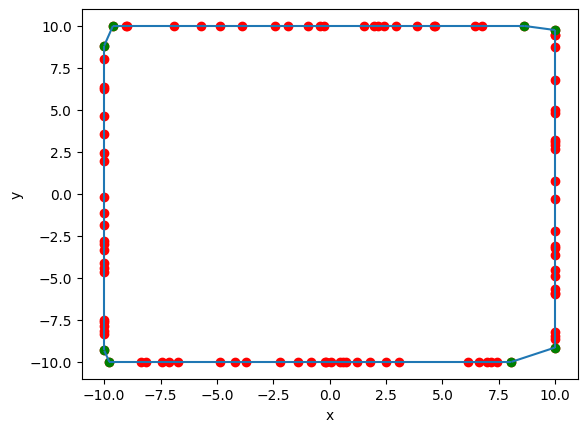

In [35]:
#Q = generate_uniform_points(n = 100)
Q = generate_rectangle_points(n = 100)
convex_hull = incremental_algorithm (Q)
#print (convex_hull)
vis.clear()
if len(Q)>2:
    vis.add_point(Q, color=['red'])
    vis.add_point(convex_hull, color=['green'])
    vis.add_line_segment([(convex_hull[i], convex_hull[i+1]) for i in range(len(convex_hull)-1)])
    vis.add_line_segment([convex_hull[-1], convex_hull[0]])
elif len(Q)==2:
    vis.add_point(Q, color=['green'])
    vis.add_line_segment(Q)
else:
   vis.add_point(Q, color=['green'])
vis.show()